# PART-2

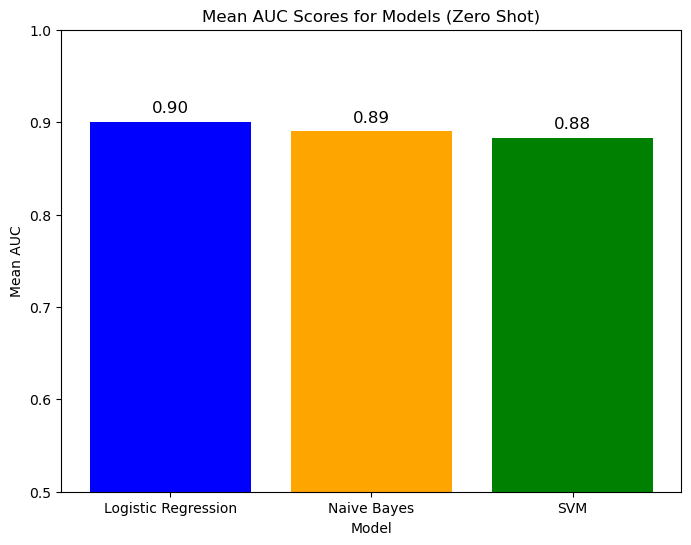

Logistic Regression:
  Mean AUC: 0.90
  AUC Scores: [0.875      0.85625    0.875      0.9125     0.98181818]

Naive Bayes:
  Mean AUC: 0.89
  AUC Scores: [0.89375    0.8125     0.84375    0.925      0.97575758]

SVM:
  Mean AUC: 0.88
  AUC Scores: [0.88125    0.8        0.85625    0.9125     0.96363636]



In [19]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv(r'C:\Users\srava\Downloads\data_stories_one_shot.csv')

# Preprocessing function
def preprocess_text(sentence):
    basic_stopwords = {
        'the', 'is', 'in', 'and', 'to', 'of', 'a', 'that', 'it', 'on', 'for', 'with', 'as', 'was', 'at', 'by', 'an', 'be',
        'this', 'or', 'from', 'but', 'not', 'are', 'they', 'his', 'she', 'which', 'you', 'we', 'their', 'there', 'can',
        'all', 'has', 'more', 'if', 'no', 'about', 'what', 'when', 'who', 'one', 'will', 'so', 'up', 'out', 'how',
        'many', 'do', 'then', 'any', 'some', 'could', 'her', 'him', 'them', 'than', 'would', 'into'
    }
    # Lowercase, remove punctuation, and tokenize
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    tokens = sentence.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in basic_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
data['Processed_Sentence'] = data['Sentence'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Processed_Sentence'])

# Target variable: 1 for "show" (level 1), 0 for "tell" (levels 2 and 3)
y = (data['Stage'] == 1).astype(int)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True)
}

# Cross-validation setup (Stratified 5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation with AUC
results = {}
mean_auc_scores = []
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    results[model_name] = {
        'Mean AUC': np.mean(auc_scores),
        'AUC Scores': auc_scores
    }
    mean_auc_scores.append(np.mean(auc_scores))

# Visualize results
model_names = list(results.keys())
plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_auc_scores, color=['blue', 'orange', 'green'])
plt.title('Mean AUC Scores for Models (Zero Shot)')
plt.ylabel('Mean AUC')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)
for i, score in enumerate(mean_auc_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=12)
plt.show()

# Display raw results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean AUC: {result['Mean AUC']:.2f}")
    print(f"  AUC Scores: {result['AUC Scores']}")
    print()
